In [1]:
import grid2op
import numpy as np
from lightsim2grid import LightSimBackend
from grid2op.Parameters import Parameters
param = Parameters()
param.ENV_DC = True
param.MAX_LINE_STATUS_CHANGED = 99999
param.MAX_SUB_CHANGED = 99999
env = grid2op.make("l2rpn_case14_sandbox", param=param)

/Users/antoinemarot/dev/grid2op_alert_feature/venv_grid2op/lib/python3.8/site-packages/grid2op/Backend/PandaPowerBackend.py:30: UserWarning: Numba cannot be loaded. You will gain possibly massive speed if installing it by 
	/Users/antoinemarot/dev/grid2op_alert_feature/venv_grid2op/bin/python -m pip install numba

  warnings.warn("Numba cannot be loaded. You will gain possibly massive speed if installing it by "
numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)



# compute the A matrix that defines the delta

$$\delta_{i,j} = \frac{F_j^{i} - F_j}{F_i}$$

with:
- $\delta_{i,j}$ : "le coefficient de report"
- $F_k$: the active flow on line `k`
- $F_j^{i}$: the flow on line j if the line i is disconnected

We are interested, given all the $\delta_{i,j}$ to compute the $\delta_{\{i,j,k, ...\}, m}$ which are the flows on line `m` when the lines $\{i,j,k, ...\}$ are disconnected

In [2]:
_ = env.reset()
#with env.copy() as tmp_env_init:
init_obs, *_ = env.simulate(env.action_space())
F = 1. * init_obs.p_or

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)



In [3]:
init_obs

In [4]:
all_flows = np.zeros((env.n_line, env.n_line))
for l_id in range(env.n_line):
    #with env.copy() as tmp_env:
    obs, *_ = env.simulate(env.action_space({"set_line_status": [(l_id, -1)]}))
    all_flows[l_id, :] = obs.p_or

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install nu

In [5]:
A = (all_flows - F) / F.reshape(-1, 1)

In [6]:
F

array([ 3.8583591e+01,  3.7616409e+01,  2.2565678e+01,  4.1696144e+01,
        3.5121765e+01,  1.6865681e+01, -2.9562853e+01,  6.4211507e+00,
        7.0682087e+00,  1.6285961e+01,  5.7788496e+00,  9.5458307e+00,
       -3.0211506e+00,  1.5682089e+00,  5.2541695e+00,  2.7484486e+01,
        1.6040195e+01,  3.6275322e+01, -1.1102230e-14, -2.7484486e+01],
      dtype=float32)

In [7]:
A[3][3]

-1.0

In [8]:
init_obs.p_or[2] + A[1, 2] * init_obs.p_or[1]

28.917064666748047

In [9]:
all_flows[1, 2]

28.917064666748047

In [10]:
all_flows[1]

array([ 76.19999695,   0.        ,  28.91706467,  54.98823929,
        53.09469223,  23.21706772, -11.00502491,   5.76739502,
         6.9721899 ,  15.95008183,   6.43260527,   9.9777298 ,
        -2.36739492,   1.47218966,   4.82227087,  28.17004204,
        16.44029236,  35.18966675,   0.        , -28.17004204])

In [11]:
env.name_line

array(['0_1_0', '0_4_1', '1_2_2', '1_3_3', '1_4_4', '2_3_5', '3_4_6',
       '5_10_7', '5_11_8', '5_12_9', '8_9_10', '8_13_11', '9_10_12',
       '11_12_13', '12_13_14', '3_6_15', '3_8_16', '4_5_17', '6_7_18',
       '6_8_19'], dtype='<U8')

<ipython-input-12-8be531440444>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


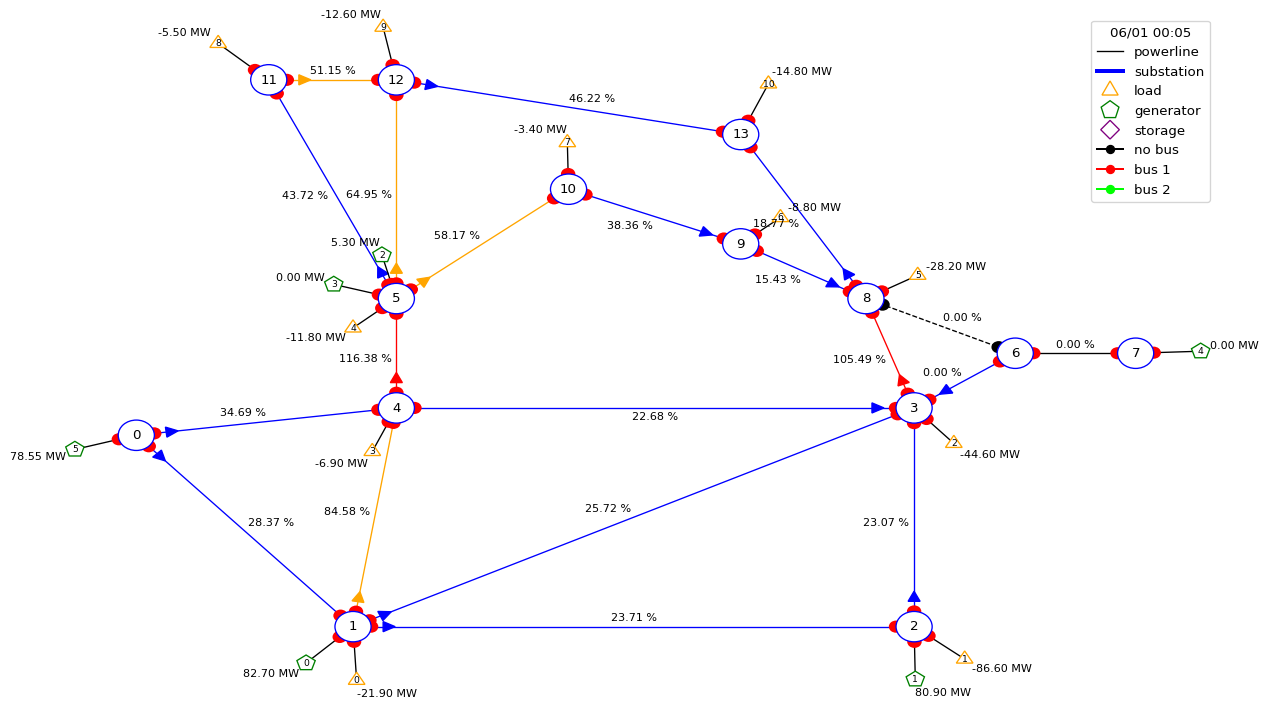

In [12]:
from grid2op.PlotGrid import PlotMatplot
plot_helper = PlotMatplot(env.observation_space)
fig = plot_helper.plot_obs(obs)
fig.show()


In [13]:
id_l1=3
id_l2=7
#with env.copy() as tmp_env:
obs, *_ = env.simulate(env.action_space({"set_line_status": [(id_l1, -1),(id_l2, -1)]}))

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)



<ipython-input-14-395f7dd74f78>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


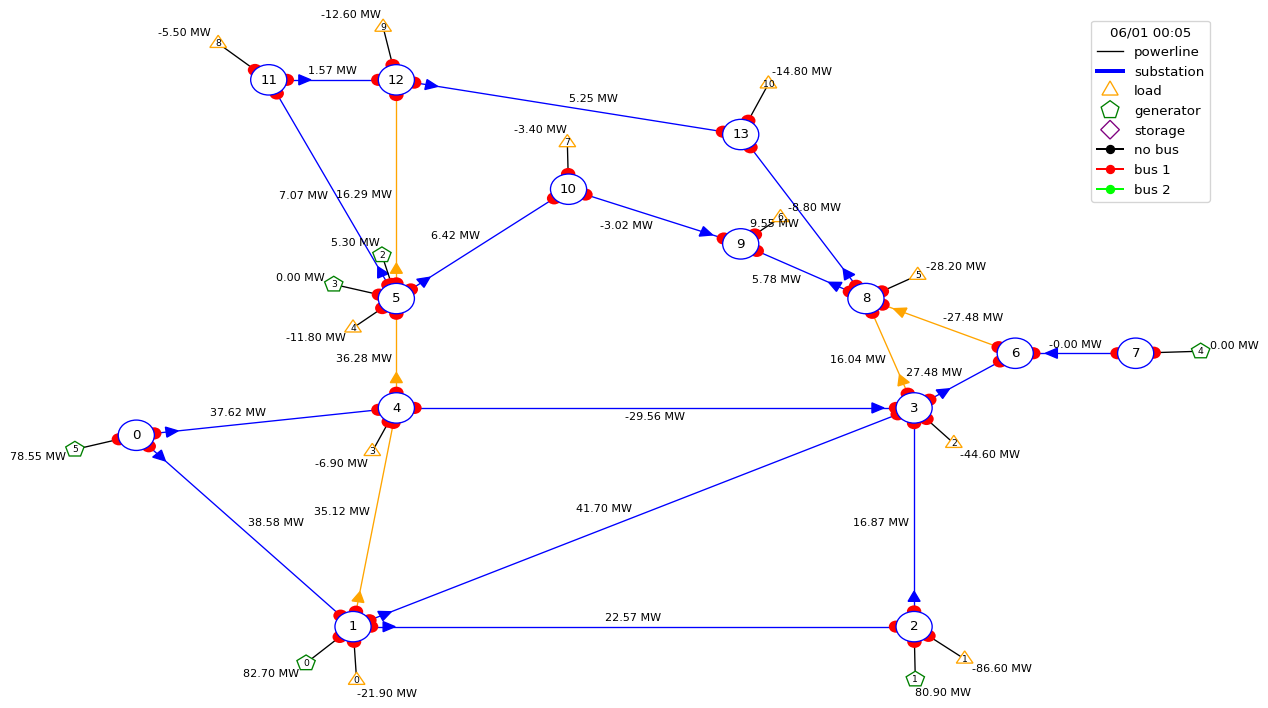

In [14]:
plot_helper = PlotMatplot(env.observation_space)
fig = plot_helper.plot_obs(init_obs,line_info='p')
fig.show()

<ipython-input-15-d0b6ac89ec88>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


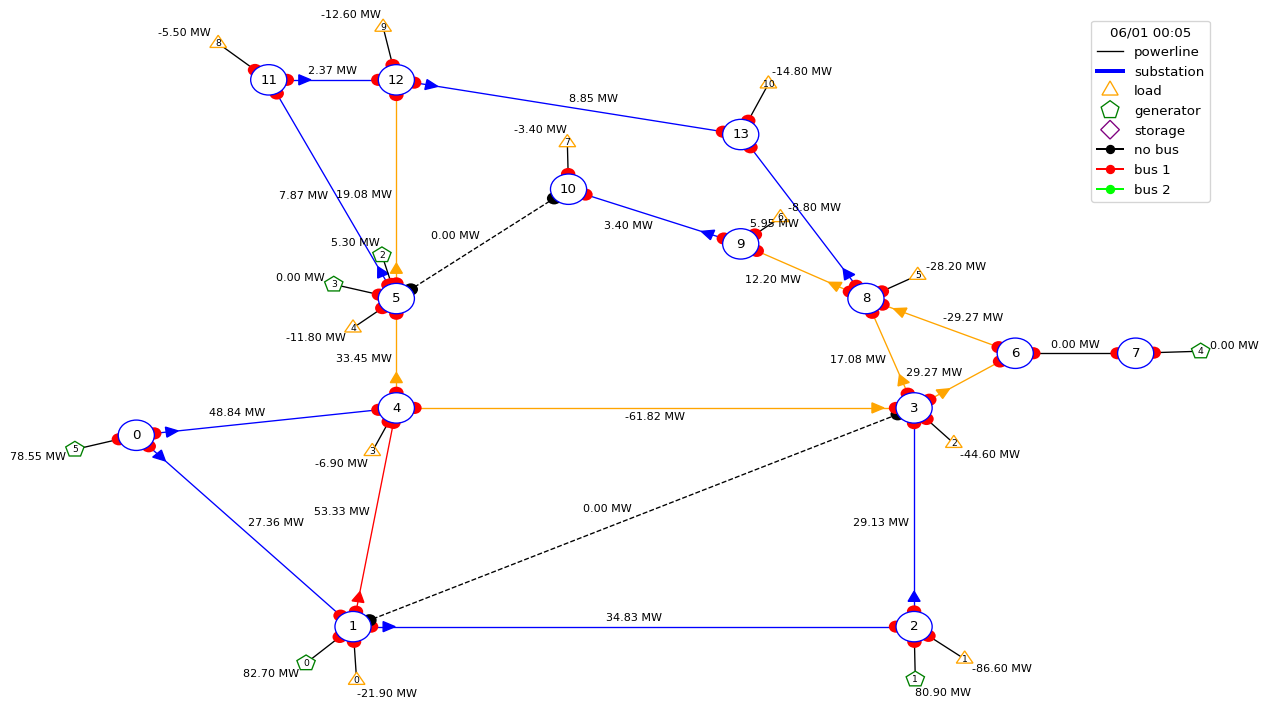

In [15]:
plot_helper = PlotMatplot(env.observation_space)
fig = plot_helper.plot_obs(obs,line_info='p')
fig.show()

# Compute N-K flows with N-1 flow distribution ratios

In [16]:
#Equations for N-2
#Fl1_prime*A[id_l1][id_l1]+Fl2_prime*A[id_l2][id_l1]=-Fl1
#Fl1_prime*A[id_l1][id_l2]+Fl2_prime*A[id_l2][id_l2]=-Fl2

In [17]:
import numpy as np

In [18]:
import numpy as np
def get_Virtual_Flows_N2(por_init,A,idl1,idl2):
    a=np.array([[A[idl1][idl1],A[idl2][idl1]],[A[idl1][idl2],A[idl2][idl2]]])
    b=np.array([-por_init[idl1],-por_init[idl2]])
    [pl1_virtual,pl2_virtual]=np.linalg.solve(a,b)
    print(pl1_virtual)
    print(pl2_virtual)
    
    por_virtual=por_init+A[idl1]*pl1_virtual+A[idl2]*pl2_virtual
    
    return por_virtual

In [19]:
#a generic version for n-K
def get_Virtual_Flows_NK(por_init,A,ilds):
    a=[]
    for idl in ilds:
        a_row=np.array([A[idlj][idl] for idlj in ilds])
        a.append(a_row)

    b=np.array([-por_init[idl] for idl in ilds])
    pls_virtual=np.linalg.solve(a,b)
    print(pls_virtual)
    
    por_virtual=por_init
    for i in range(len(ilds)):
        por_virtual+=A[ilds[i]]*pls_virtual[i]
    
    return por_virtual

In [20]:
#a reccursive approximation without solving equations
def get_Virtual_Flows_reccursion_approx_N2(por_init,A,idl1,idl2,iter=10):
    p1_init=por_init[idl1]+por_init[idl2]*A[idl2][idl1]
    pl1_virtual=p1_init
    
    coeff_iter=0
    for i in range(iter):
        #pl1_virtual+=p1_init*(A[idl1][idl2]**(i+1))*(A[idl2][idl1]**(i+1))
        coeff_iter+=(A[idl1][idl2]**(i+1))*(A[idl2][idl1]**(i+1))
    
    pl1_virtual+=p1_init*coeff_iter
    
    p2_init=por_init[idl2]+por_init[idl1]*A[idl1][idl2]
    pl2_virtual=p2_init
    
    #for i in range(iter):
    #    pl2_virtual+=p2_init*(A[idl1][idl2]**(i+1))*(A[idl2][idl1]**(i+1))
    
    pl2_virtual+=p2_init*coeff_iter
    
    print(pl1_virtual)
    print(pl2_virtual)
    
    por_virtual=por_init+A[idl1]*pl1_virtual+A[idl2]*pl2_virtual
    
    return por_virtual
    

In [21]:
por_init=init_obs.p_or

In [22]:
idl1=3
idl2=4
por_virtual_N2=get_Virtual_Flows_N2(por_init,A,idl1,idl2)

70.35573775031565
66.23066358184452


In [23]:
por_virtua_N2_approx=get_Virtual_Flows_reccursion_approx_N2(por_init,A,idl1,idl2)

70.35573686508613
66.23066274851747


In [24]:
por_virtual_NK=get_Virtual_Flows_NK(por_init.copy(),A,[idl1,idl2])

[70.35573775 66.23066358]


## comparing to real N-2 load flow

In [25]:
#with env.copy() as tmp_env:
obs, *_ = env.simulate(env.action_space({"set_line_status": [(idl1, -1),(idl2, -1)]}))

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)



<ipython-input-26-d0b6ac89ec88>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


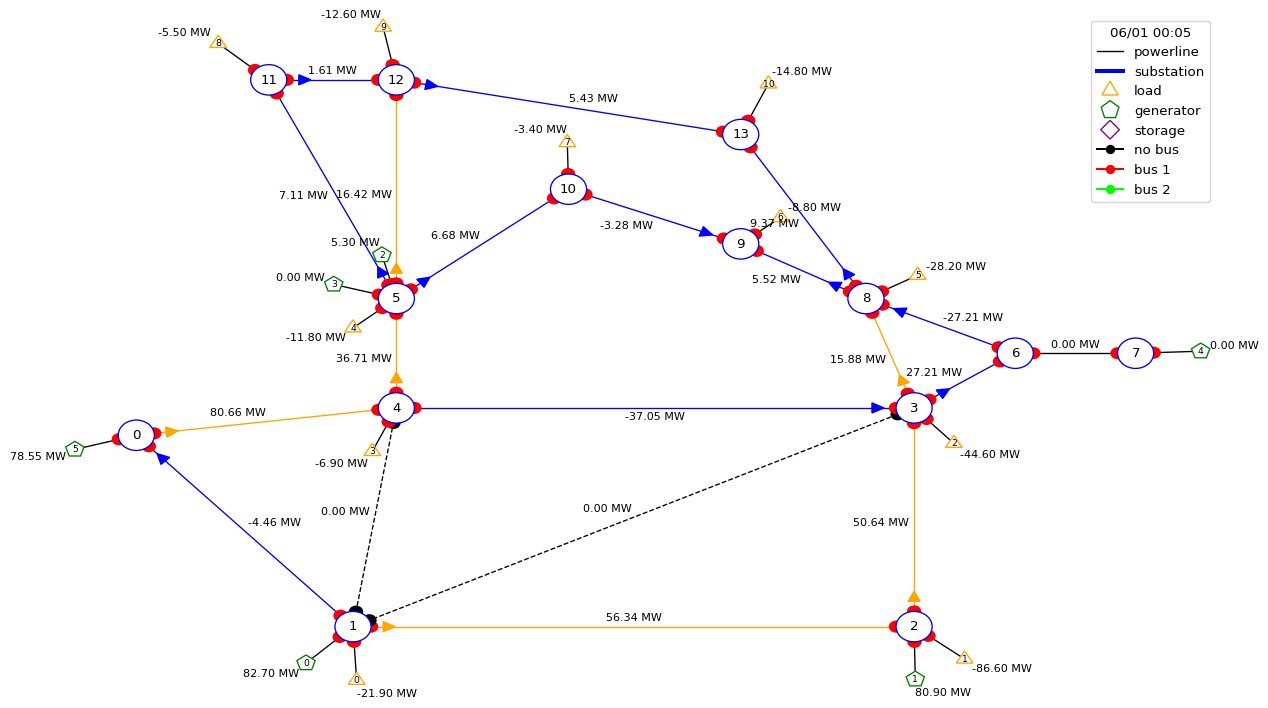

In [26]:
plot_helper = PlotMatplot(env.observation_space)
fig = plot_helper.plot_obs(obs,line_info='p')
fig.show()

In [27]:
np.max(np.abs(por_virtual_N2-obs.p_or))

3.554069483158173e-06

## comparing to real N-K load flow

In [28]:
idls=[3,4,7,14]
#with env.copy() as tmp_env:
obs_NK, *_ = env.simulate(env.action_space({"set_line_status": [(idl, -1) for idl in idls]}))

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)



<ipython-input-29-7aa62d7e4dc0>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


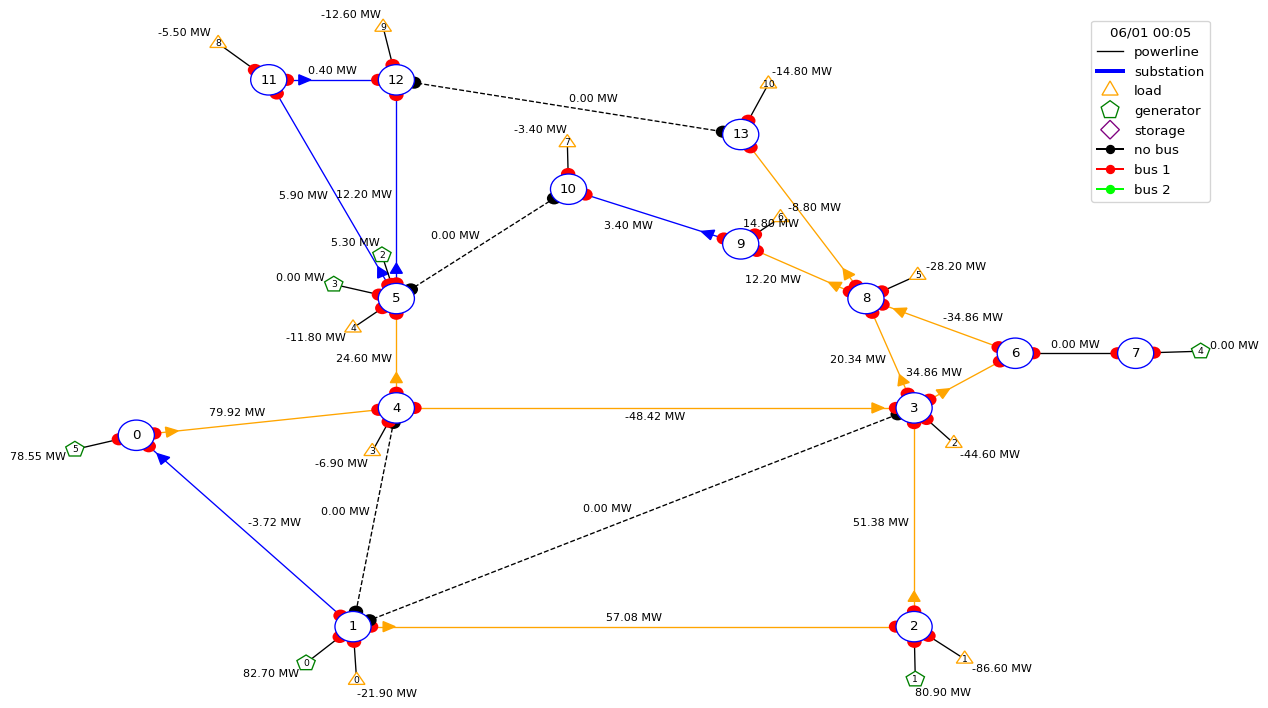

In [29]:
plot_helper = PlotMatplot(env.observation_space)
fig = plot_helper.plot_obs(obs_NK,line_info='p')
fig.show()

In [30]:
por_virtual_NK=get_Virtual_Flows_NK(por_init.copy(),A,idls)

[71.31969722 65.47736318 11.7305305  10.08241989]


In [31]:
np.max(np.abs(por_virtual_NK-obs_NK.p_or))

1.1444092e-05

## Do topological changes now

In [32]:
from sub_elems import get_valid_sub_action

In [33]:
import json
action_dict_file="unitary_actions_l2rpn_2019.json"
with open(action_dict_file) as jsonFile:
    jsonObject = json.load(jsonFile)
    jsonFile.close()

In [34]:
jsonObject

{'sub_4': {'a': {'lines_id_bus': [[4, 2]], 'loads_id_bus': [[3, 2]]},
  'b': {'lines_id_bus': [[4, 2], [6, 2]]},
  'c': {'lines_id_bus': [[1, 2], [17, 2]]},
  'd': {}},
 'sub_3': {'a': {'lines_id_bus': [[6, 2], [16, 2]]},
  'b': {'lines_id_bus': [[6, 2], [15, 2]]},
  'c': {'lines_id_bus': [[16, 2], [5, 2]]},
  'd': {'lines_id_bus': [[16, 2], [5, 2], [6, 2]]},
  'e': {}},
 'sub_1': {'a': {'lines_id_bus': [[0, 2], [4, 2]], 'loads_id_bus': [[0, 2]]},
  'b': {'lines_id_bus': [[0, 2], [4, 2], [2, 2]]},
  'c': {'lines_id_bus': [[0, 2], [3, 2], [4, 2]]},
  'd': {}},
 'sub_8': {'a': {'lines_id_bus': [[19, 2], [10, 2], [11, 2]]},
  'b': {'lines_id_bus': [[16, 2], [11, 2]]},
  'c': {}},
 'sub_5': {'a': {'lines_id_bus': [[17, 2], [9, 2], [7, 2]]}, 'b': {}}}

### Check correctness by doing N-2 somehow with one N-1 and one topological change

#### Apply first topological change and compute virtual flow from virtual line that will be dispatched by node splitting

In [43]:
sub_id=4
action_1_def={sub_id:{'lines_id_bus': [[4, 2], [6, 2]]}}
#action_1_def={sub_id:{'lines_id_bus': [[4, 2]]}}
action1=get_valid_sub_action(env.action_space,action_1_def)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)



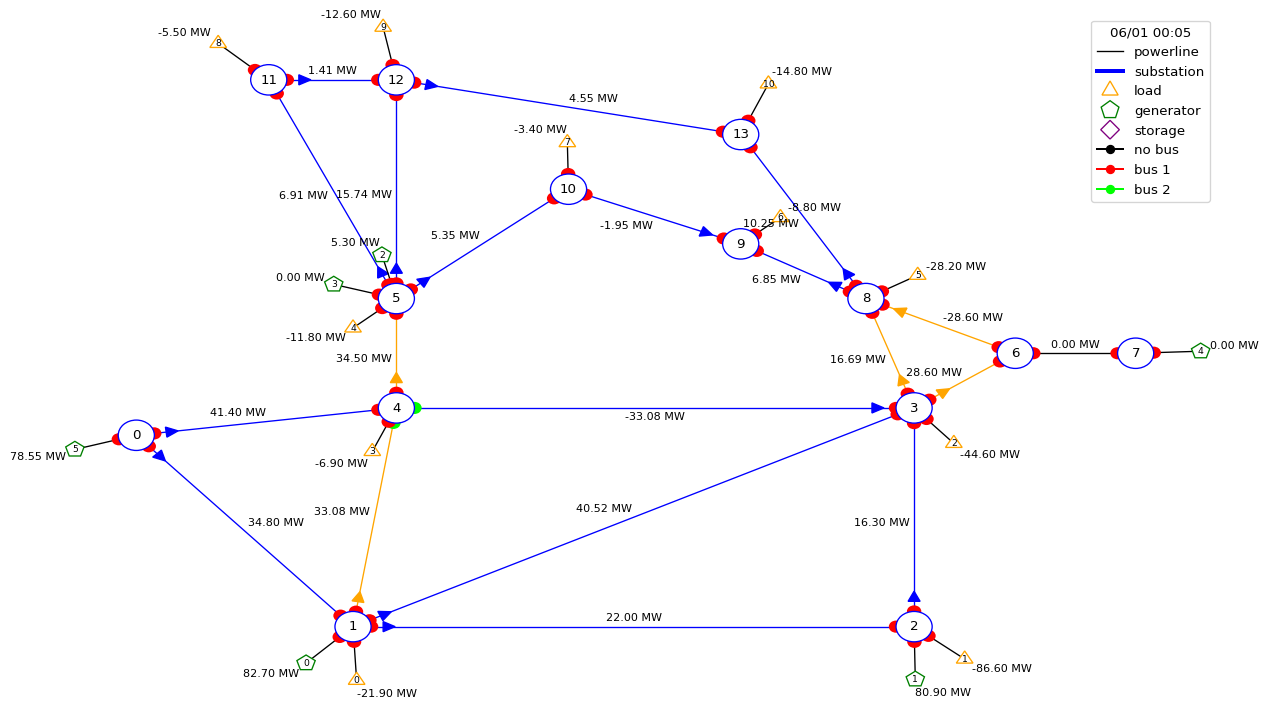

In [133]:
#obs = env.reset()
obs, reward, done, info = env.simulate(env.action_space(action1))
fig_obs = plot_helper.plot_obs(obs, line_info='p')

In [60]:
env.name_line

array(['0_1_0', '0_4_1', '1_2_2', '1_3_3', '1_4_4', '2_3_5', '3_4_6',
       '5_10_7', '5_11_8', '5_12_9', '8_9_10', '8_13_11', '9_10_12',
       '11_12_13', '12_13_14', '3_6_15', '3_8_16', '4_5_17', '6_7_18',
       '6_8_19'], dtype='<U8')

In [46]:
obs_init, reward, done, info = env.simulate(env.action_space({}))

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)



<ipython-input-68-454859aad0a5>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


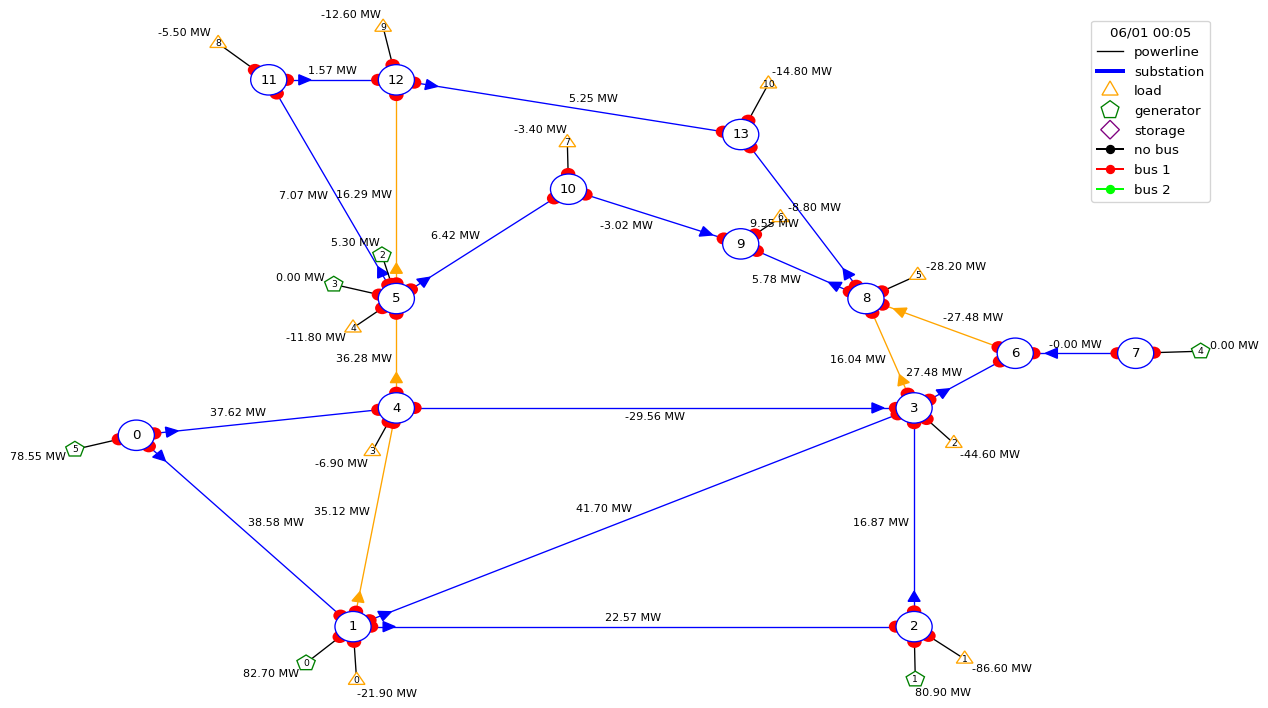

In [68]:
plot_helper = PlotMatplot(env.observation_space)
fig = plot_helper.plot_obs(obs_init,line_info='p')
fig.show()

In [66]:
delta_flow=obs.p_or-obs_init.p_or
delta_flow

array([-3.7860374e+00,  3.7860374e+00, -5.6282997e-01, -1.1778793e+00,
       -2.0453262e+00, -5.6282997e-01, -3.5135860e+00, -1.0675836e+00,
       -1.5679932e-01, -5.4849148e-01,  1.0675836e+00,  7.0529079e-01,
        1.0675836e+00, -1.5679955e-01, -7.0529127e-01,  1.1195145e+00,
        6.5336037e-01, -1.7728767e+00,  1.1102230e-14, -1.1195145e+00],
      dtype=float32)

In [300]:
a=[]
ilds=[1,17,4,6]
for idl in ilds:
    a_row=[A[idlj][idl] for idlj in ilds]
    a.append(a_row)
a=np.array(a)
b=np.array([delta_flow[idl] for idl in ilds])
print(b)
pls_virt=np.linalg.solve(a,b)
print(pls_virtual)

[ 3.7860374 -1.7728767 -2.0453262 -3.513586 ]
[-11.43387478   5.52957192  -9.98687765 -12.82480569]


In [76]:
delta_flow_recomputed=np.zeros(20)
for i in range(len(ilds)):
    delta_flow_recomputed+= A[ilds[i]]*pls_virtual[i]

In [77]:
delta_flow_recomputed

array([-3.78603574e+00,  3.78603745e+00, -5.62828314e-01, -1.17788041e+00,
       -2.04532623e+00, -5.62828314e-01, -3.51358604e+00, -1.06758407e+00,
       -1.56799726e-01, -5.48492330e-01,  1.06758404e+00,  7.05291424e-01,
        1.06758414e+00, -1.56799619e-01, -7.05291569e-01,  1.11951615e+00,
        6.53360184e-01, -1.77287674e+00,  3.13403260e-15, -1.11951615e+00])

In [ ]:
delta_flow_action=5.56
delta_flow_0_4+delta_flow_4_5=delta_flow_action

In [45]:
flow_mat, (load, prod, stor, ind_lor, ind_lex) = obs.flow_bus_matrix()

In [38]:
#flow_mat, (load, prod, stor, ind_lor, ind_lex) = init_obs.flow_bus_matrix()

In [81]:
ids_node1=[1,17]
A[1][1]*por_init[1]+A[1][17]*por_init[1]

-38.702064514160156

In [127]:
a+np.identity(4)

array([[ 0.        , -0.05967827,  0.36050673,  0.28986837],
       [-0.02886121,  0.        , -0.03534348, -0.23967058],
       [ 0.47779486, -0.09685875,  0.        ,  0.47046092],
       [ 0.49334395, -0.84346299,  0.60414974,  0.        ]])

In [135]:
obs_init.theta_or[ilds]

array([ 0.       , -4.807095 , -1.3080575, -5.5203657], dtype=float32)

In [136]:
obs.theta_or[ilds]

array([ 0.       , -5.290922 , -1.1797036, -5.2730174], dtype=float32)

In [ ]:
#node1

In [142]:
from scipy import stats
stats.entropy([0.47779486, 0.49334395])

0.6930189959472255

In [143]:
stats.entropy([ 0.09685875, 0.84346299])

0.33163799899773094

In [307]:
stats.entropy([0.97, 0.94])

0.6930238236057475

In [145]:
3.7860374/ 1.7728767

2.1355333960900946

In [144]:
0.69/0.33

2.090909090909091

In [ ]:
#node2

In [146]:
stats.entropy([0.36050673,  0.03534348])

0.30088041041353664

In [147]:
stats.entropy([0.28986837,  0.23967058])

0.6886473550112536

In [148]:
0.688/0.301

2.2857142857142856

In [152]:
from cvxopt import matrix, solvers
#!pip install --trusted-host pypi.python.org cvxopt

## try pseudo inverse

In [304]:
ilds=[1,17,4,6]
ilds_node1=[1,17]
ilds_node2=[4,6]

In [302]:
#AX=[alpha,-(5.56-alpha),-beta,-5.56+beta]

a_augmented=[]

last_coeff=[[-1,0],[-1,0],[0,1],[0,-1]]
b=[0,-5.56,0,-5.56]#,-5.56]
for i in range(len(ilds)):
    a_row=[A[idlj][ilds[i]] for idlj in ilds]
    a_row+=last_coeff[i]
    #a_row=np.array(a_row)
    a_augmented.append(a_row)
    
#adding constraint that on the virtual line we should have -5.56 
#(42.09-(5.56))/37.62=0.971 for line 1 => np.sum(A[1][ilds_node2])
#(-28.55-(5.56))/36.28=-0.94 for line 17 => np.sum(A[17][ilds_node2])
#(-8.34-(5.56))/35.12=-0.396 for line 4 => np.sum(A[4][ilds_node2])
#(21.21-(5.56))/-29.56=-0.53 for line 6 => -np.sum(A[6][ilds_node2])

#a_row=[np.sum(A[idlj][ilds_node2]) for idlj in ilds]
#a_row+=[0,0]
#a_row=np.array(a_row)
#a_augmented.append(a_row)
a=np.array(a)

pinv=np.linalg.pinv(a_augmented)

In [315]:
#AX=[alpha,-(5.56-alpha),-beta,-5.56+beta]

a_augmented=[]

last_coeff=[[0],[0],[-1],[-1]]
b=[3.7860374,-1.7728767,0,-5.56]#,-5.56]
for i in range(len(ilds)):
    a_row=[A[idlj][ilds[i]] for idlj in ilds]
    a_row+=last_coeff[i]
    #a_row=np.array(a_row)
    a_augmented.append(a_row)
    
#adding constraint that on the virtual line we should have -5.56 
#(42.09-(5.56))/37.62=0.971 for line 1 => np.sum(A[1][ilds_node2])
#(-28.55-(5.56))/36.28=-0.94 for line 17 => np.sum(A[17][ilds_node2])
#(-8.34-(5.56))/35.12=-0.396 for line 4 => np.sum(A[4][ilds_node2])
#(21.21-(5.56))/-29.56=-0.53 for line 6 => -np.sum(A[6][ilds_node2])

#a_row=[np.sum(A[idlj][ilds_node2]) for idlj in ilds]
#a_row+=[0,0]
#a_row=np.array(a_row)
#a_augmented.append(a_row)
a=np.array(a)

pinv=np.linalg.pinv(a_augmented)

In [316]:
a_augmented

[[-1.0, -0.059678266398215316, 0.36050672534691147, 0.2898683688691127, 0],
 [-0.028861213299048488, -1.0, -0.03534347928089185, -0.23967058441883965, 0],
 [0.4777948620594679, -0.09685874693118084, -1.0, 0.47046091767520254, -1],
 [0.4933439499940979, -0.8434629866706038, 0.6041497410654548, -1.0, -1]]

In [317]:
#array([ 3.7860374, -1.7728767, -2.0453262, -3.513586 ] true values
x = pinv.dot(b)#[-1.98257326  4.19641916 -0.60737363 -0.13390695  1.47436056  0.80934757]
print(x)

[-3.26226221e+00  1.25451623e+00 -4.47376108e-01  2.62161975e+00
  5.42751652e-04]


In [299]:
a

[array([-1.        , -0.05967827,  0.36050673,  0.28986837]),
 array([-0.02886121, -1.        , -0.03534348, -0.23967058]),
 array([ 0.47779486, -0.09685875, -1.        ,  0.47046092]),
 array([ 0.49334395, -0.84346299,  0.60414974, -1.        ])]

In [303]:
a.dot(x[0:4])

array([ 1.47436057, -4.08563944, -0.80934758, -4.75065243])

In [285]:
delta_flow_recomputed=np.zeros(20)
for i in range(len(ilds)):
    delta_flow_recomputed+= A[ilds[i]]*x[i]

In [286]:
delta_flow_recomputed

array([-1.47436033e+00,  1.47436057e+00, -2.15020542e-01, -4.49992179e-01,
       -8.09347577e-01, -2.15020542e-01, -4.75065243e+00, -2.46027628e+00,
       -3.61348970e-01, -1.26401406e+00,  2.46027622e+00,  1.62536303e+00,
        2.46027633e+00, -3.61348967e-01, -1.62536305e+00,  2.57995438e+00,
        1.50568496e+00, -4.08563944e+00,  7.49478658e-16, -2.57995438e+00])

In [275]:
#sub_id=4
#sign_sum=[1 if env.line_or_to_subid[idl]==sub_id else -1 for idl in ilds]
#sign_sum

[-1, 1, -1, -1]

### Resistance Matrix

In [ ]:
env.

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

<ipython-input-86-1d7851251705>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


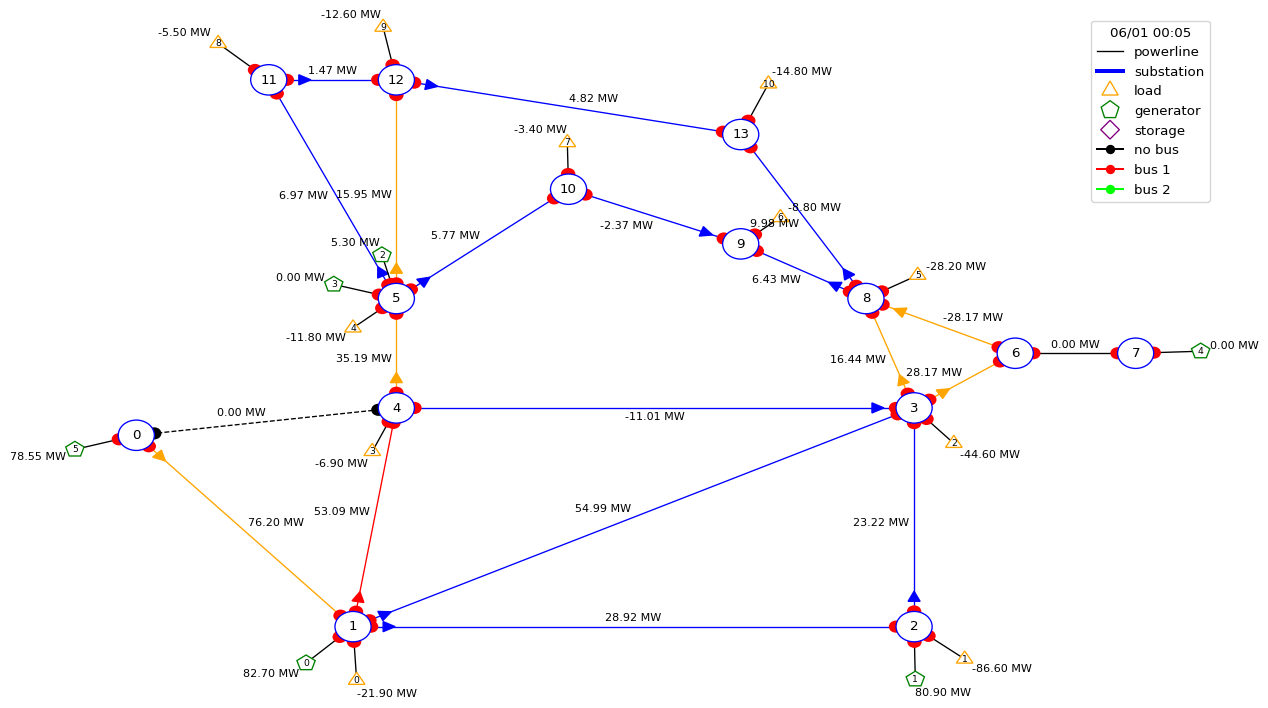

In [86]:
obs_l1, *_ = env.simulate(env.action_space({"set_line_status": [(1, -1)]}))
fig = plot_helper.plot_obs(obs_l1,line_info='p')
fig.show()

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

<ipython-input-87-266dfcbc7f9c>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


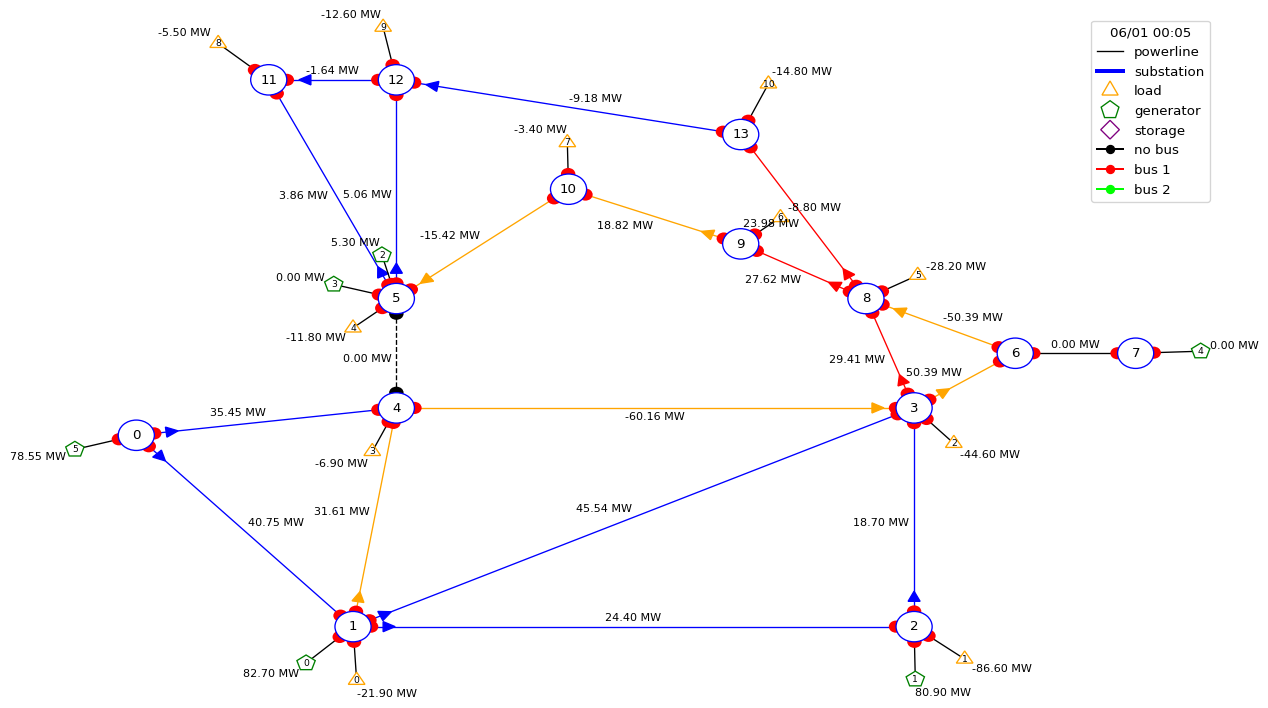

In [87]:
obs_l17, *_ = env.simulate(env.action_space({"set_line_status": [(17, -1)]}))
fig = plot_helper.plot_obs(obs_l17,line_info='p')
fig.show()

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

<ipython-input-243-1beff1836e98>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


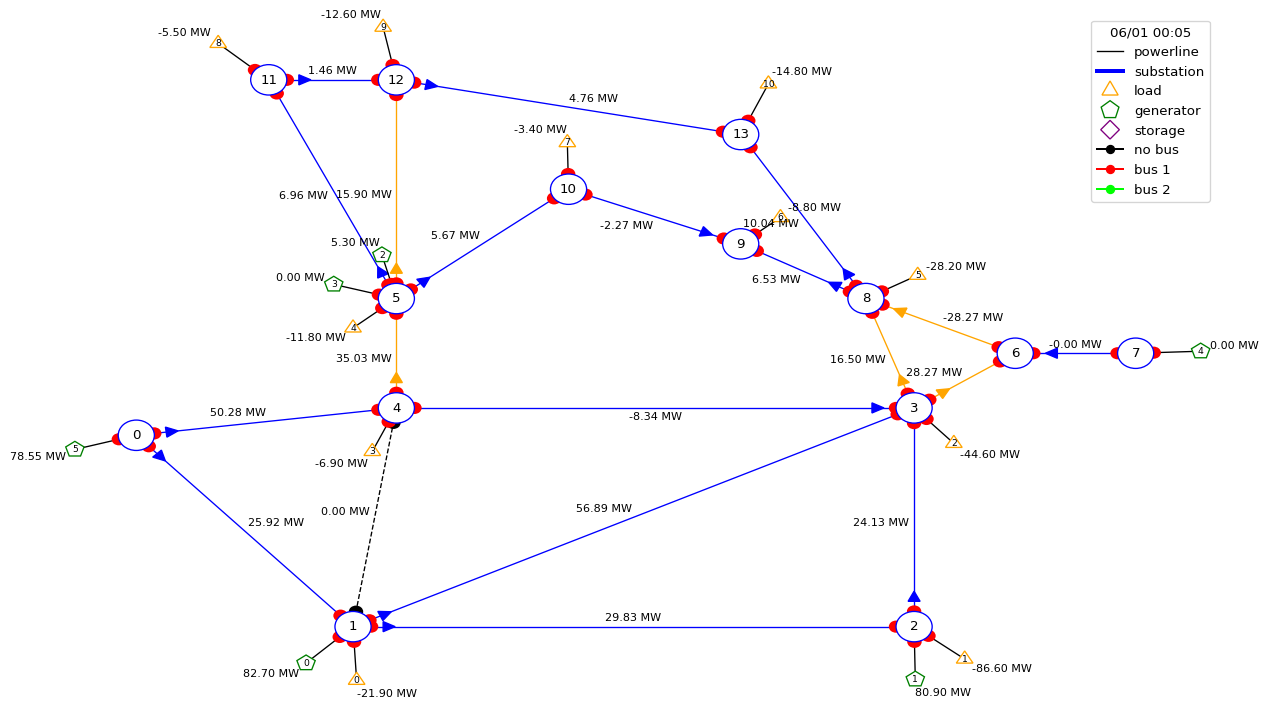

In [243]:
obs_l17, *_ = env.simulate(env.action_space({"set_line_status": [(4, -1)]}))
fig = plot_helper.plot_obs(obs_l17,line_info='p')
fig.show()

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

<ipython-input-244-040d12f18a06>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


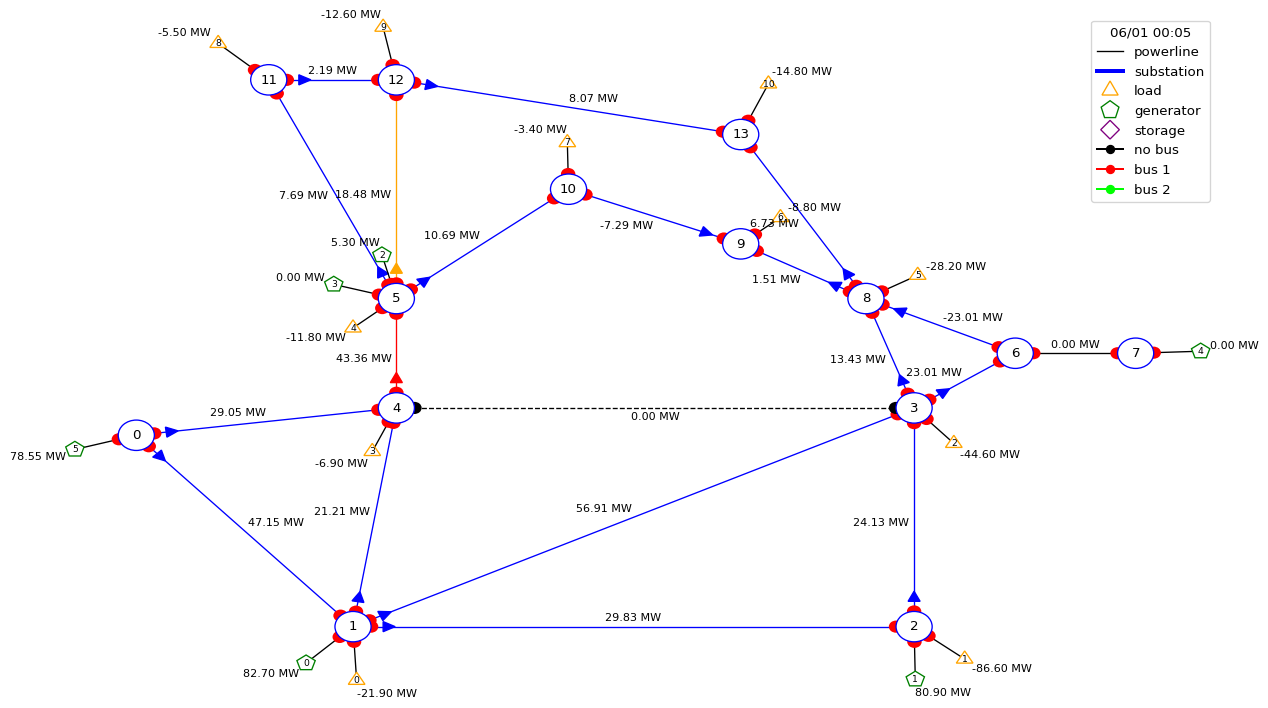

In [244]:
obs_l6, *_ = env.simulate(env.action_space({"set_line_status": [(6, -1)]}))
fig = plot_helper.plot_obs(obs_l6,line_info='p')
fig.show()

In [61]:
InjectionsNode1=[-por_init[i] for i in range(env.n_line) if ind_lor[i]==sub_id]
InjectionsNode1+=[por_init[i] for i in range(env.n_line) if ind_lex[i]==sub_id]
InjectionsNode1+=[-init_obs.load_p[i] for i in range(len(load)) if load[i]==sub_id]
InjectionsNode1+=[init_obs.gen_p[i] for i in range(len(prod)) if prod[i]==sub_id]
InjectionsNode1

[-36.275322, 37.61641, -6.9]

In [64]:
np.sum(InjectionsNode1)

-5.5589128

In [41]:
#sub_id_2=14
#InjectionsNode2=[-por_init[i] for i in range(env.n_line) if ind_lor[i]==sub_id_2]
#InjectionsNode2+=[por_init[i] for i in range(env.n_line) if ind_lex[i]==sub_id_2]
#InjectionsNode2+=[-init_obs.load_p[i] for i in range(len(load)) if load[i]==sub_id_2]
#InjectionsNode2+=[init_obs.gen_p[i] for i in range(len(prod)) if prod[i]==sub_id_2]
#InjectionsNode2

In [42]:
virtualFlow=-np.sum(InjectionsNode1)

In [258]:
F_topo = virtualFlow
A_topo=(obs.p_or-por_init)/F_topo#.reshape(-1, 1)
#delta_flow_topo=np.abs(obs.p_or-por_init)/

In [259]:
A_topo

array([-3.6050677e-01,  3.6050671e-01,  2.0676929e-01,  4.3272394e-01,
       -1.0000000e+00,  2.0676929e-01,  6.0414976e-01, -2.1283003e-02,
       -3.1258960e-03, -1.0934554e-02,  2.1283003e-02,  1.4060450e-02,
        2.1283003e-02, -3.1259062e-03, -1.4060450e-02,  2.2318279e-02,
        1.3025146e-02, -3.5343479e-02,  3.1610685e-16, -2.2318279e-02],
      dtype=float32)

In [260]:
#por_init+virtualFlow*A_topo

#### Compute combined N-1 + topological change

In [266]:
def get_A_idl1_virtual_line(A,ind_lor,ind_lex,sub_id):
    A_idl1_virtual_line=[A[idl1][i] for i in range(env.n_line) if ind_lor[i]==sub_id]
    A_idl1_virtual_line+=[-A[idl1][i] for i in range(env.n_line) if ind_lex[i]==sub_id]
    print(A_idl1_virtual_line)
    A_idl1_virtual_line=np.sum(A_idl1_virtual_line)
    print(A_idl1_virtual_line)
    
    return A_idl1_virtual_line

def get_Virtual_Flows_N1_topo(por_init,por_topo,A,idl1,A_topo,ind_lor,ind_lex,sub_id ):
    A_idl1_virtual_line=get_A_idl1_virtual_line(A,ind_lor,ind_lex,sub_id)
   
    a=np.array([[A[idl1][idl1],A[idl2][idl1]],[A[idl1][idl2],A[idl2][idl2]]])
    
    a=np.array([[-1,A_topo[idl1]],[A_idl1_virtual_line,-1]])
    b=np.array([-por_init[idl1],-por_topo])
    #print(a)
    #print(b)
    [pl1_virtual,pl2_virtual]=np.linalg.solve(a,b)
    print(pl1_virtual)
    print(pl2_virtual)
    
    por_virtual=por_init+A[idl1]*pl1_virtual+A_topo*pl2_virtual
    
    return por_virtual

In [267]:
virtualFlow

35.121765

In [269]:
line_action={"set_line_status": [(idl1, -1)]}
act=env.action_space(line_action)
act+=env.action_space(action1)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)



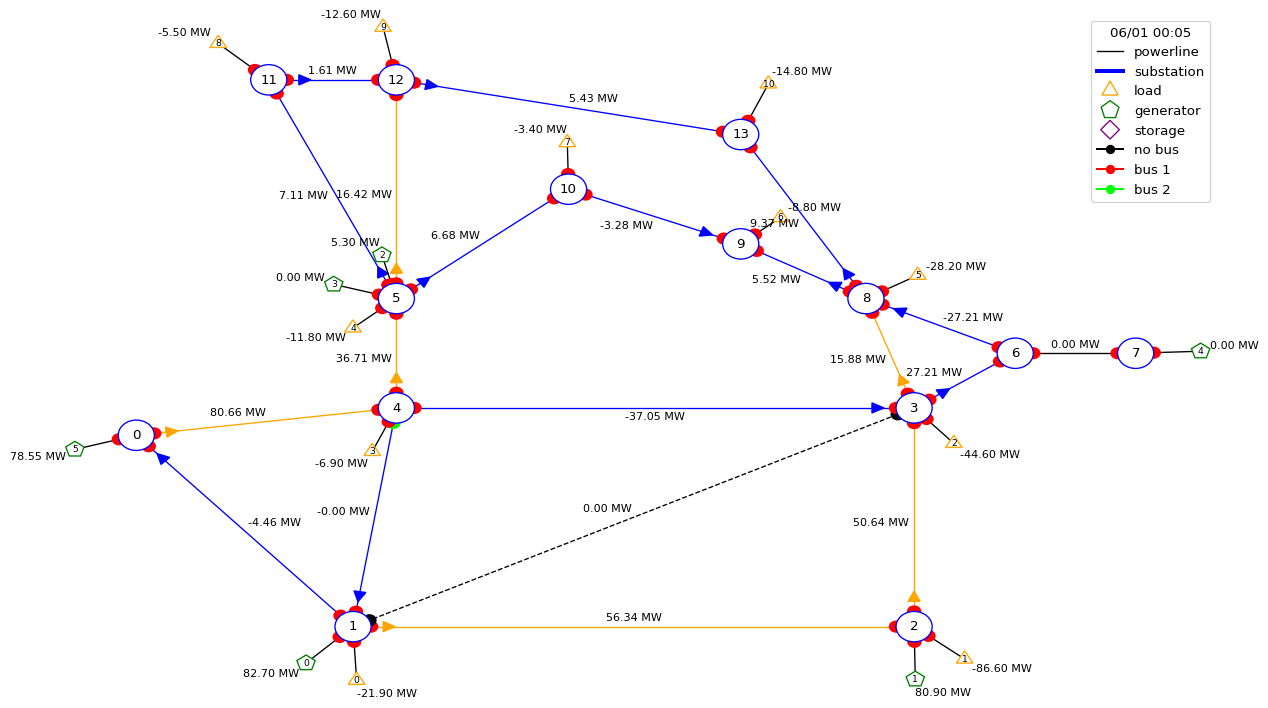

In [270]:
obs_topo_N1, reward, done, info = env.simulate(act)
fig_obs = plot_helper.plot_obs(obs_topo_N1, line_info='p')

In [271]:
idl1=3
por_virtual_topo_N1=get_Virtual_Flows_N1_topo(por_init,virtualFlow,A,idl1,A_topo,ind_lor,ind_lex,sub_id)

[0.03949445921162586, -0.2724346441674472, 0.675105901946444]
0.4421657169906227
70.35573603945282
66.2306596070064


In [272]:
np.max(np.abs(por_virtual_topo_N1-obs_topo_N1.p_or))

3.340496277988436e-06

In [240]:
#can be compared to previous N-2 computation in that case
idl1=3
idl2=4
por_virtual_N2=get_Virtual_Flows_N2(por_init,A,idl1,idl2)

[[-1.          0.43272394]
 [ 0.44216576 -1.        ]]
[-41.696144 -35.121765]
70.35573775031565
66.23066358184452


In [217]:
np.max(np.abs(por_virtual_N2-obs_topo_N1.p_or))

3.554069483158173e-06

### Now try one real bus splitting topological change + N-1

#### Apply first topological change and compute virtual flow from virtual line that will be dispatched by node splitting

In [273]:
sub_id=4
action_1_def={sub_id:{'lines_id_bus': [[4, 2], [6, 2]]}}
#action_1_def={sub_id:{'lines_id_bus': [[4, 2]]}}
action1=get_valid_sub_action(env.action_space,action_1_def)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)



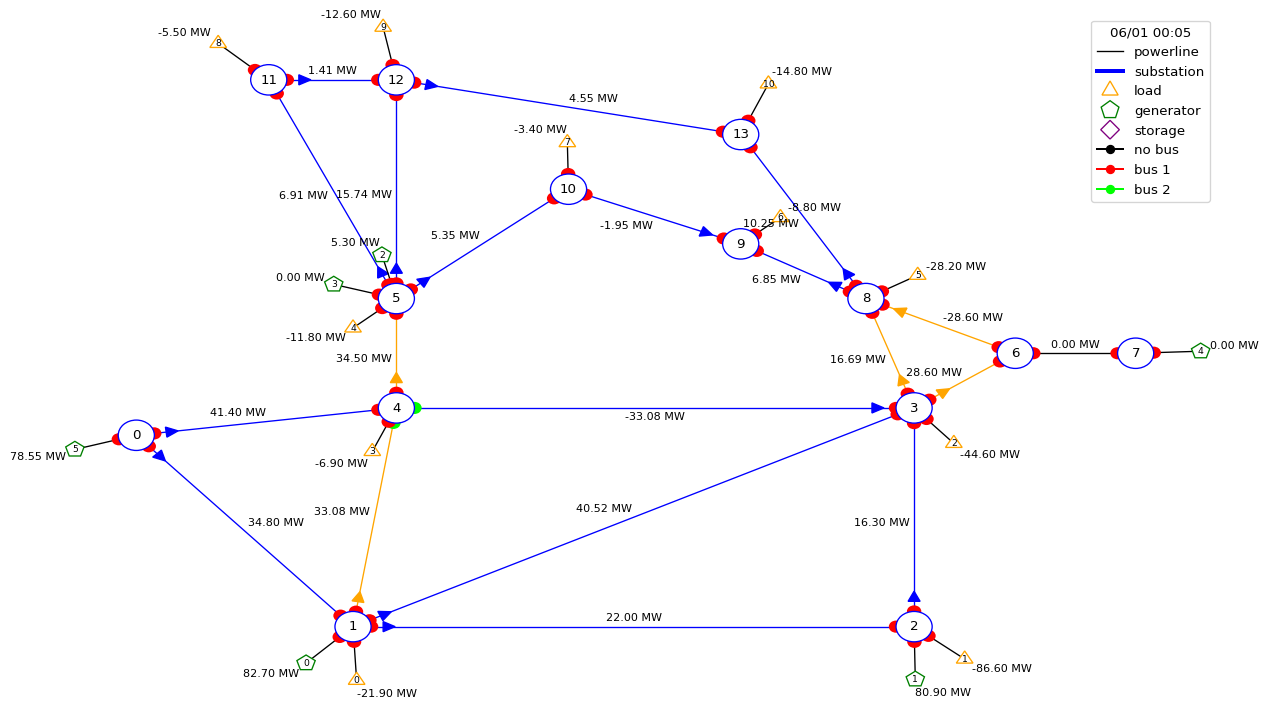

In [274]:
#obs = env.reset()
obs, reward, done, info = env.simulate(env.action_space(action1))
fig_obs = plot_helper.plot_obs(obs, line_info='p')

In [281]:
flow_mat, (load, prod, stor, ind_lor, ind_lex) = obs.flow_bus_matrix()

In [282]:
InjectionsNode1=[-por_init[i] for i in range(env.n_line) if ind_lor[i]==sub_id]
InjectionsNode1+=[por_init[i] for i in range(env.n_line) if ind_lex[i]==sub_id]
InjectionsNode1+=[-init_obs.load_p[i] for i in range(len(load)) if load[i]==sub_id]
InjectionsNode1+=[init_obs.gen_p[i] for i in range(len(prod)) if prod[i]==sub_id]
InjectionsNode1

[-36.275322, 37.61641, -6.9]

In [283]:
np.sum(InjectionsNode1)

-5.5589128

In [284]:
virtualFlow=-np.sum(InjectionsNode1)

In [285]:
F_topo = virtualFlow
A_topo=(obs.p_or-por_init)/F_topo#.reshape(-1, 1)
#delta_flow_topo=np.abs(obs.p_or-por_init)/

In [286]:
A_topo

array([-6.8107516e-01,  6.8107516e-01, -1.0124821e-01, -2.1189024e-01,
       -3.6793637e-01, -1.0124821e-01, -6.3206351e-01, -1.9204898e-01,
       -2.8206831e-02, -9.8668844e-02,  1.9204898e-01,  1.2687567e-01,
        1.9204898e-01, -2.8206874e-02, -1.2687576e-01,  2.0139091e-01,
        1.1753384e-01, -3.1892508e-01,  1.9971946e-15, -2.0139091e-01],
      dtype=float32)

In [287]:
#por_init+virtualFlow*A_topo

#### Compute combined N-1 + topological change

In [288]:
def get_A_idl1_virtual_line(A,ind_lor,ind_lex,sub_id):
    A_idl1_virtual_line=[A[idl1][i] for i in range(env.n_line) if ind_lor[i]==sub_id]
    A_idl1_virtual_line+=[-A[idl1][i] for i in range(env.n_line) if ind_lex[i]==sub_id]
    print(A_idl1_virtual_line)
    A_idl1_virtual_line=np.sum(A_idl1_virtual_line)
    print(A_idl1_virtual_line)
    
    return A_idl1_virtual_line

def get_Virtual_Flows_N1_topo(por_init,por_topo,A,idl1,A_topo,ind_lor,ind_lex,sub_id ):
    A_idl1_virtual_line=get_A_idl1_virtual_line(A,ind_lor,ind_lex,sub_id)
   
    a=np.array([[A[idl1][idl1],A[idl2][idl1]],[A[idl1][idl2],A[idl2][idl2]]])
    
    a=np.array([[-1,A_topo[idl1]],[A_idl1_virtual_line,-1]])
    b=np.array([-por_init[idl1],-por_topo])
    #print(a)
    #print(b)
    [pl1_virtual,pl2_virtual]=np.linalg.solve(a,b)
    print(pl1_virtual)
    print(pl2_virtual)
    
    por_virtual=por_init+A[idl1]*pl1_virtual+A_topo*pl2_virtual
    
    return por_virtual

In [289]:
virtualFlow

5.5589128

In [290]:
line_action={"set_line_status": [(idl1, -1)]}
act=env.action_space(line_action)
act+=env.action_space(action1)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)



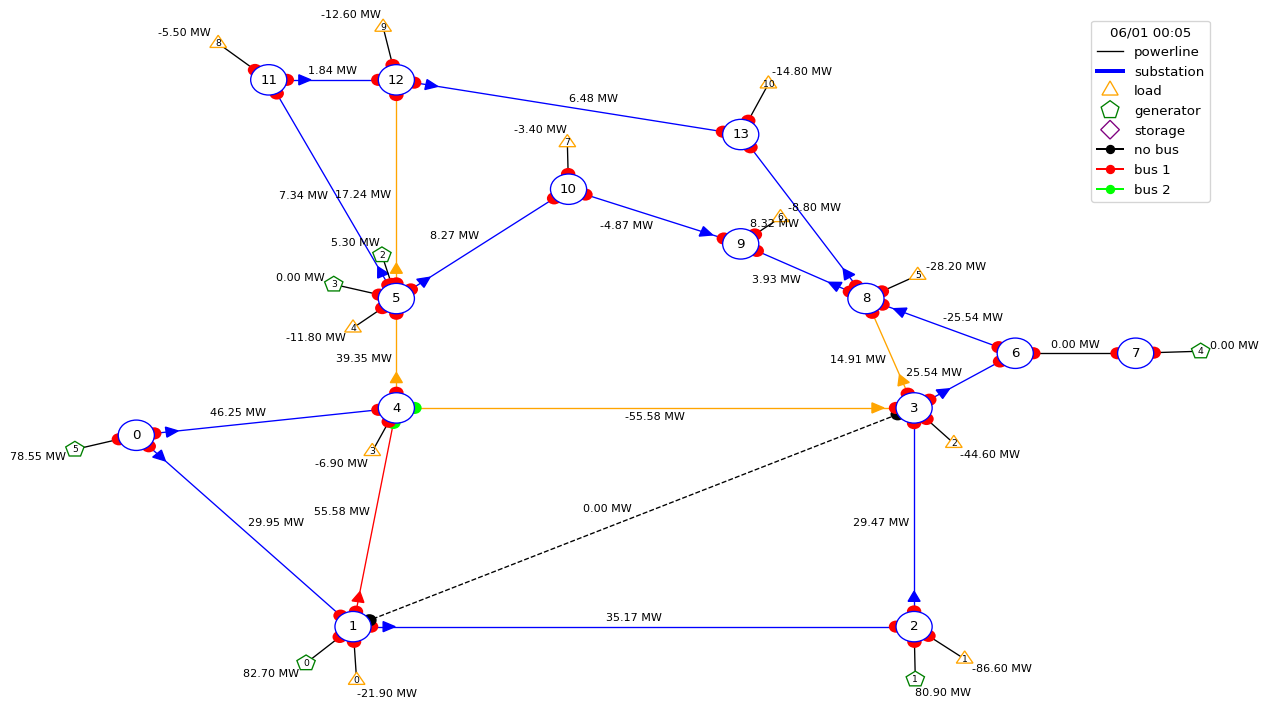

In [291]:
obs_topo_N1, reward, done, info = env.simulate(act)
fig_obs = plot_helper.plot_obs(obs_topo_N1, line_info='p')

In [292]:
idl1=3
por_virtual_topo_N1=get_Virtual_Flows_N1_topo(por_init,virtualFlow,A,idl1,A_topo,ind_lor,ind_lex,sub_id)

[0.03949445921162586, -0.2724346441674472]
-0.23294018495582136
42.62199034307362
-4.369461559641963


In [293]:
np.max(np.abs(por_virtual_topo_N1-obs_topo_N1.p_or))

2.708169205334343e-06